In [66]:
import cartopy.crs as ccrs
import xarray as xr
import matplotlib.pyplot as plt



In [67]:
from mpl_toolkits.basemap import Basemap

In [68]:
import cartopy

In [69]:
%matplotlib inline

In [70]:
path = "/home/wanderson/Documentos/ncl/"

In [71]:
DS_NCEP = xr.open_dataset(path +'MAY2015_24Z_12Z_NCEP.nc')

In [72]:
GPM = xr.open_dataset(path +'GPM_REC_ACUM_24h_grib2.nc')

In [73]:
te = GPM.PREC_surface.mean('time')
te

<xarray.DataArray 'PREC_surface' (latitude: 702, longitude: 651)>
array([[1.725 , 1.9375, 2.1375, ..., 1.555 , 1.4625, 1.465 ],
       [1.765 , 1.9525, 2.0425, ..., 1.615 , 1.3975, 1.3575],
       [1.7425, 1.81  , 1.845 , ..., 1.42  , 1.3275, 1.2375],
       ...,
       [1.555 , 2.26  , 1.6825, ..., 0.    , 0.    , 0.    ],
       [2.1275, 2.3625, 2.1675, ..., 0.    , 0.    , 0.    ],
       [3.2375, 2.99  , 3.165 , ..., 0.    , 0.    , 0.    ]], dtype=float32)
Coordinates:
  * longitude  (longitude) float64 269.9 270.1 270.1 270.2 ... 334.8 334.9 334.9
  * latitude   (latitude) float64 -57.05 -56.95 -56.85 ... 12.85 12.95 13.05

In [74]:
#da = DS_NCEP.prec.mean('time')
#da
da = DS_NCEP.prec.mean('time')

In [75]:
#var  = DS_NCEP.variables['prec'][0,:,:]
lons = DS_NCEP.variables['lon'][:]
lats = DS_NCEP.variables['lat'][:]

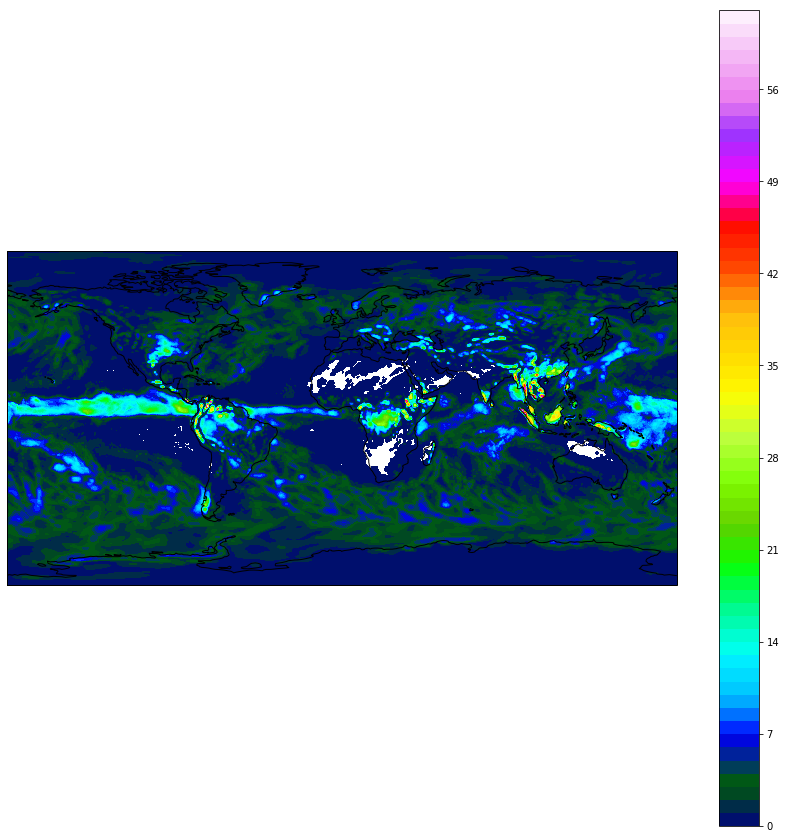

In [90]:
fig, ax = plt.subplots(figsize=(15,15))

ax = plt.axes(projection=ccrs.PlateCarree())
#cp = plt.contourf(lons,lats,da, 70, transform=ccrs.PlateCarree(),cmap=plt.cm.gist_ncar,zorder=1)
cp = plt.contourf(lons,lats,da, 70, cmap=plt.cm.gist_ncar,zorder=1)
ax.coastlines(resolution='110m')

#ax.set_extent([-85, -30, -60, 15])

plt.colorbar(cp)
#ax.stock_img()
#da.plot()
#plt.show()

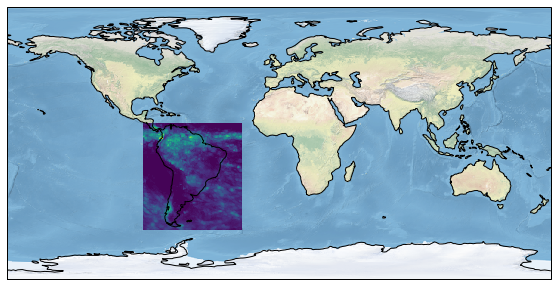

In [24]:
lonss = GPM.variables['longitude'][:]
latss = GPM.variables['latitude'][:]
pylab.rcParams['figure.figsize'] = (20,5)
ax = plt.axes(projection=ccrs.PlateCarree())
plt.contourf(lonss,latss,te, 70, transform=ccrs.PlateCarree())
ax.coastlines()
ax.stock_img()
#da.plot()
plt.show()

In [25]:
DS_SMG_V200 = xr.open_dataset(path +'MAY2015_24Z_12Z_SMG.nc')
tt = DS_SMG_V200.prec.mean('time')
lons = DS_NCEP.variables['lon'][:]
lats = DS_NCEP.variables['lat'][:]

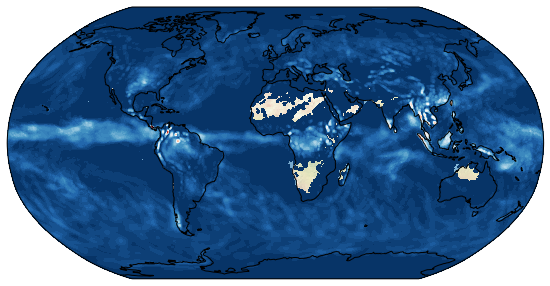

In [36]:
pylab.rcParams['figure.figsize'] = (20,5)
ax = plt.axes(projection=ccrs.Robinson())
plt.contourf(lons,lats,tt, 70, transform=ccrs.PlateCarree(),cmap=plt.cm.RdBu_r)
ax.coastlines()
ax.stock_img()
#da.plot()
plt.show()